In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from collections import defaultdict


%matplotlib inline

# Data description, goal

We want to predict which claim amount customers of a car insurance company would get based on their information the car insurance company collected. Therefore, we need to clean the data, look at the desicrptive statistics and thibnk about a model rthan cpuld predict future claim amounts

# Getting Data

In [2]:
file = pd.read_csv('marketing_customer_analysis.csv')
file.shape

(10910, 26)

In [3]:
file.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
display(file.columns)# in order to see all columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

# Dealing with data

##### Look at data types

In [5]:
file.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [6]:
file._get_numeric_data()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [7]:
file.select_dtypes('object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


##### Correct columns and filter out duplicates or customers with zero income

In [8]:
# correct dataframe headers and delete unnecessary column
file = file.drop(['Unnamed: 0'], axis=1)
file = file.rename(columns={'EmploymentStatus':'Employment Status'}) # EmploymentStatus has no space

In [9]:
#delete duplicates
print(file.shape)
#file2 = file.copy()
file = file.drop_duplicates() 

print(file.shape)

(10910, 25)
(10873, 25)


In [10]:
#filter out customers that have no income
file=file[file['Income']>0]
print(file.shape)

(8095, 25)


### Deal with NaN values

In [11]:
file.isna().sum()
round(file.isna().sum()/len(file),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(file.isna().sum()/len(file),2)*100) #division not multiplication like in instructions

nulls_df = nulls_df.reset_index()

nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Customer,0.0
1,State,6.0
2,Customer Lifetime Value,0.0
3,Response,6.0
4,Coverage,0.0
5,Education,0.0
6,Effective To Date,0.0
7,Employment Status,0.0
8,Gender,0.0
9,Income,0.0


In [12]:
file = file.drop(['Vehicle Type'], axis=1)  # vehicle type has 50% NaNs therefore its not useful

In [13]:
file['Months Since Last Claim'].value_counts(dropna=False)

NaN     449
3.0     312
6.0     304
1.0     304
10.0    285
7.0     284
4.0     274
0.0     268
5.0     264
2.0     263
11.0    252
16.0    247
8.0     238
15.0    237
14.0    232
13.0    225
17.0    220
23.0    216
12.0    214
25.0    207
21.0    206
20.0    204
19.0    194
9.0     191
18.0    181
22.0    176
28.0    176
24.0    171
29.0    170
31.0    161
34.0    158
26.0    153
33.0    153
30.0    149
27.0    144
32.0    114
35.0     99
Name: Months Since Last Claim, dtype: int64

In [14]:
#replace Nans with mean
mean_last_claim = file['Months Since Last Claim'].mean()
file['Months Since Last Claim'] = file['Months Since Last Claim'].fillna(mean_last_claim)

In [15]:
file['Number of Open Complaints'].value_counts(dropna=False)

0.0    6064
1.0     872
NaN     449
2.0     305
3.0     232
4.0     125
5.0      48
Name: Number of Open Complaints, dtype: int64

In [16]:
#replace Nans with median
median_complaints = file['Number of Open Complaints'].median()
file['Number of Open Complaints'] = file['Number of Open Complaints'].fillna(median_complaints)

In [17]:
#drop NaN rows in the columns state, vehicle class and vehicle size which all have 6% NaN's
file=file.dropna(subset=['State','Vehicle Class','Vehicle Size'])

In [18]:
#check if all NaN's are gone

file.isna().sum()
round(file.isna().sum()/len(file),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(file.isna().sum()/len(file),2)*100) #division not multiplication like in instructions

nulls_df = nulls_df.reset_index()

nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Customer,0.0
1,State,0.0
2,Customer Lifetime Value,0.0
3,Response,0.0
4,Coverage,0.0
5,Education,0.0
6,Effective To Date,0.0
7,Employment Status,0.0
8,Gender,0.0
9,Income,0.0


##### deal with date format, extract only months

In [19]:
file['month'] = pd.DatetimeIndex(file['Effective To Date']).month
file['month'].unique()# only january and feburary are included

array([2, 1])

In [20]:
#therefore the data only includes only january and february, but one can filter the data
file[(file['month']==1) | (file['month']==2)]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,1
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


# Exploratory data analysis

In [21]:
file.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month
count,7215.000000,7215.000000,7215.000000,7215.000000,7215.000000,7215.000000,7215.000000,7215.000000,7215.000000
mean,8117.272718,50380.882606,92.913652,15.049583,47.917117,0.360776,2.957034,377.886881,1.468468
std,6907.826761,24280.556813,34.483530,9.783191,27.912008,0.884037,2.395839,251.412288,0.499039
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4096.286684,28380.000000,68.000000,7.000000,24.000000,0.000000,1.000000,211.426415,1.000000
50%,5811.918112,48029.000000,83.000000,15.000000,48.000000,0.000000,2.000000,341.088276,1.000000
75%,9066.458849,70060.000000,109.000000,23.000000,71.000000,0.000000,4.000000,499.200000,2.000000
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


##### Which sales channel was most efficient for the company?

In [22]:
#to calculate response rate we need the number of YES/NO for each sales channel
table= file.groupby(['Sales Channel', 'Response']).size()
#divide each yes and no count by the total number of responses for that channel
rates = []
for i in range(1, len(table), 2):
    rates.append(table[i]/(table[i]+table[i-1]))

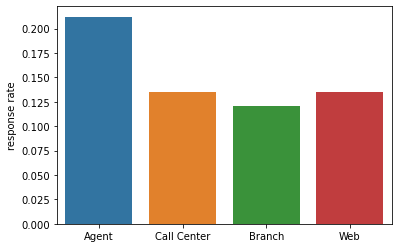

In [23]:
ax=sns.barplot(x=file['Sales Channel'].unique(), y=rates)
ax.set(ylabel='response rate')
plt.show()

##### How is the response rate for different claim amounts?

In [24]:
#split data into yes and no
YES=file[file['Response']=='Yes']
NO=file[file['Response']=='No']
#creat bins manually
claim_bins=np.linspace(0,3000,10)# 3000 because its the maximum of total claim amount shown in file.describe()
#generate histogram with np.histogram
YES_hist=np.histogram(YES['Total Claim Amount'],bins=claim_bins,range=(0,3000))
NO_hist=np.histogram(NO['Total Claim Amount'],bins=claim_bins,range=(0,3000))
#calculate reponse rate
hist_response_rate=YES_hist[0]/(YES_hist[0]+NO_hist[0])

Text(0, 0.5, 'Response Rate')

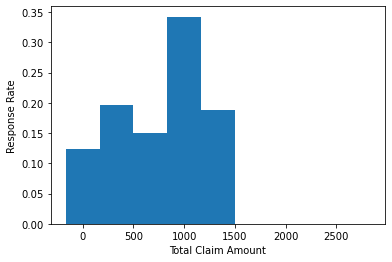

In [25]:
plt.bar(claim_bins[:-1],hist_response_rate,width=claim_bins[1]-claim_bins[0])
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')

##### --> Yes reponses occur exlucively below a total claim amount of 1500

##### How is the response rate for different income levels?

In [26]:
#creat bins manually
income_bins=np.linspace(0,100000,10)# 100000 because its the maximum of total claim amount shown in file.describe()
#generate histogram with np.histogram
YES_hist2=np.histogram(YES['Income'],bins=income_bins,range=(0,100000))
NO_hist2=np.histogram(NO['Income'],bins=income_bins,range=(0,100000))
hist_response_rate2=YES_hist2[0]/(YES_hist2[0]+NO_hist2[0])

Text(0, 0.5, 'Response Rate')

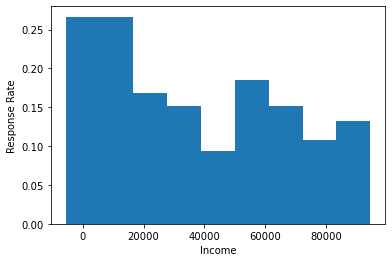

In [27]:
plt.bar(income_bins[:-1],hist_response_rate2,width=income_bins[1]-income_bins[0])
plt.xlabel('Income')
plt.ylabel('Response Rate')

##### --> Yes reponses are quite distrubruted among different levels of income

# Closer look at numerical data (distribution, correlation, normalize)

In [28]:
numerical=file.select_dtypes(include=['float64','int64'])

#### Distribution plots

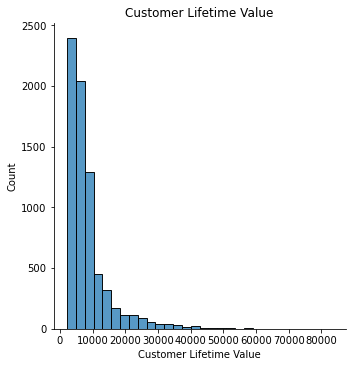

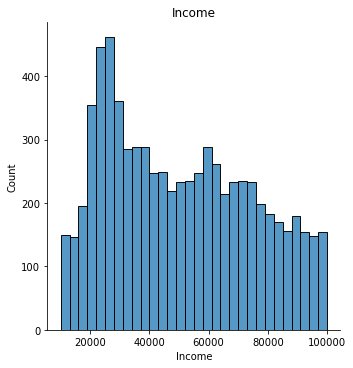

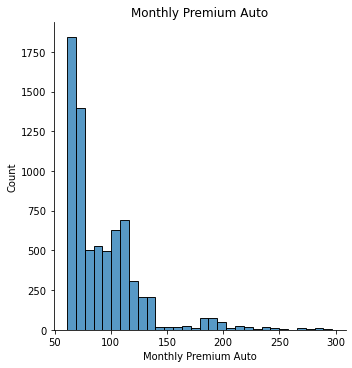

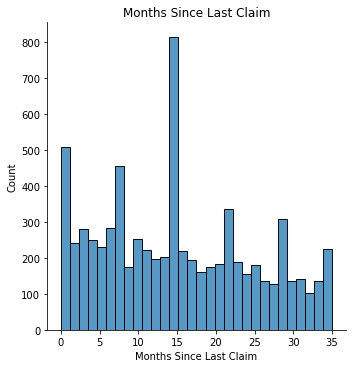

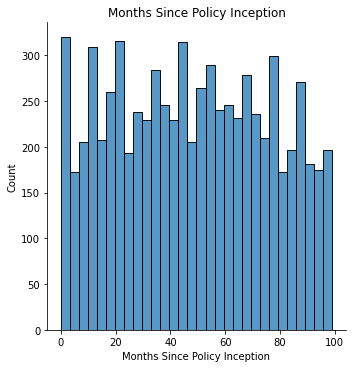

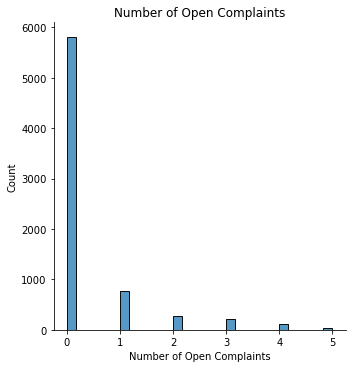

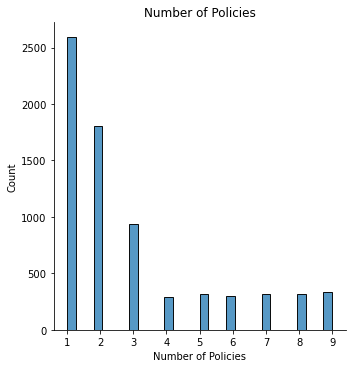

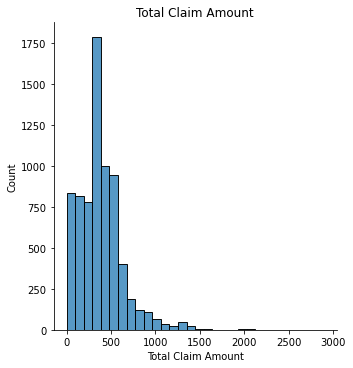

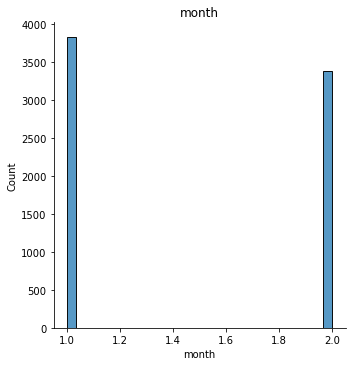

In [29]:
for i in numerical.columns:
    sns.displot(x=i, data= numerical, bins=30)
    plt.title(i)
    plt.show()

#### Correlations between numerical values

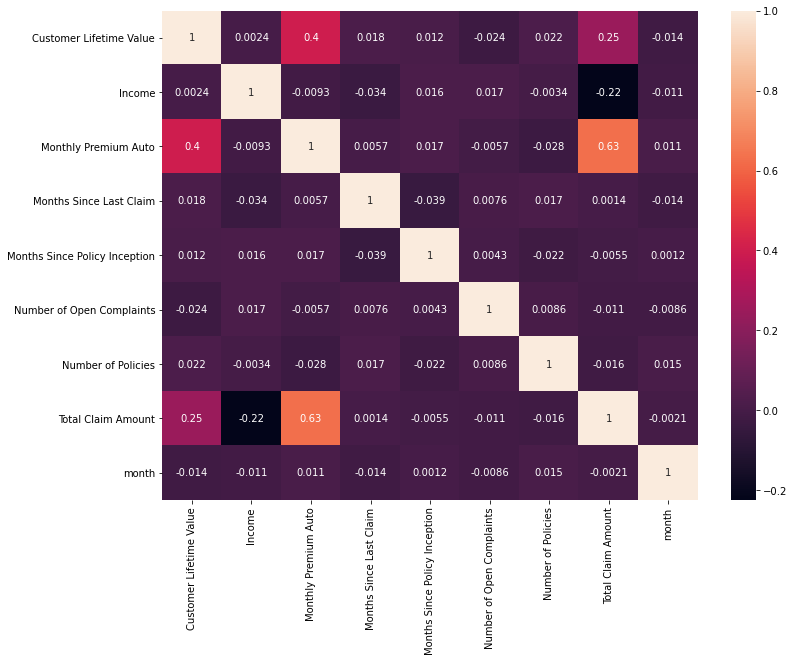

In [30]:
plt.figure(figsize=(12, 9))
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### --> Our target value (Total Claim amount) correlates high with Monthly premium Auto, and slightly with customer lifetime value
#### --> income correlates slightly negatively with total claim amount

#### Split the data from the target value for modeling

In [31]:
X_num=file.select_dtypes(include = np.number)

y= file['Total Claim Amount']
X_num=X_num.drop(['Total Claim Amount'], axis=1)

#### Normalize numerical data: MinMax Scaler

In [32]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
#x_normalized
file2=pd.DataFrame(x_normalized, columns=X_num.columns)

(7215, 8)


In [33]:
file2.head(1)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,month
0,0.033117,0.422396,0.0,0.2,0.525253,0.0,1.0,1.0


In [34]:
#drop values that have a very low correlation below +/-0.1 with target: total claim amount
file2_clean = file2.copy()
file2_clean=file2_clean.drop(['Months Since Policy Inception','Number of Policies','month','Months Since Last Claim','Number of Open Complaints'], axis =1)

In [35]:
file2_clean.head(1)

,Customer Lifetime Value,Income,Monthly Premium Auto
0,0.033117,0.422396,0.0


# Closer look at categorical data (clean, encode)

In [36]:
categorical=file.select_dtypes(include=['object'])
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,2/14/11,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize


#### clean

In [37]:
categorical = categorical.drop(['Policy Type'], axis=1) #we can drop the policy type becasue its already in Policy included
categorical = categorical.drop(['Effective To Date'], axis=1)# we dont need this date as well
categorical = categorical.drop(['Customer'], axis=1)# the customer ID doesnt help our model to predict anything
categorical = categorical.drop(['Sales Channel'], axis=1)# Sales channel doesnt help our model to predict anything
categorical.head(1)

,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Vehicle Class,Vehicle Size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate L3,Offer3,Four-Door Car,Medsize


### encode categorical data

### One hot encoder

In [38]:
X_cat_hot=categorical.drop(['Coverage','Education','Policy','Renew Offer Type','Vehicle Class','Vehicle Size'], axis=1)#creat inpout for one hot encoder
X_cat_hot.head(1)

,State,Response,Employment Status,Gender,Location Code,Marital Status
0,Arizona,No,Employed,M,Suburban,Married


In [39]:
df2=X_cat_hot
encoder = OneHotEncoder().fit(df2)
encoded_for_p = encoder.transform(df2).toarray()
encoded_for_p
encoder.categories_
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded_for_p = pd.DataFrame(encoded_for_p, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded_for_p = onehot_encoded_for_p.drop(cols_to_drop,axis=1)
onehot_encoded_for_p.head(2)

,California,Nevada,Oregon,Washington,Yes,Employed,Medical Leave,Retired,M,Suburban,Urban,Married,Single
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


### Label encoder

In [40]:
X_cat_label=categorical.drop(['State','Response','Employment Status','Gender','Location Code','Marital Status'], axis=1)#creat inpout for one hot encoder
X_cat_label.head(1)

,Coverage,Education,Policy,Renew Offer Type,Vehicle Class,Vehicle Size
0,Basic,College,Corporate L3,Offer3,Four-Door Car,Medsize


In [41]:
df3=X_cat_label
encoder_dict = defaultdict(LabelEncoder)
labeled_df = df3.apply(lambda x: encoder_dict[x.name].fit_transform(x))
labeled_df.head(2)

,Coverage,Education,Policy,Renew Offer Type,Vehicle Class,Vehicle Size
0,0,1,2,2,0,1
2,0,0,5,2,3,1


# Linear regression model

### concat numerical and categorical data

In [50]:
X_regression=pd.concat([file2_clean.reset_index(drop=True),onehot_encoded_for_p.reset_index(drop=True),labeled_df.reset_index(drop=True)], axis=1)
X_regression.head(1)

,Customer Lifetime Value,Income,Monthly Premium Auto,California,Nevada,Oregon,Washington,Yes,Employed,Medical Leave,...,Suburban,Urban,Married,Single,Coverage,Education,Policy,Renew Offer Type,Vehicle Class,Vehicle Size
0,0.033117,0.422396,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0,1,2,2,0,1


### Train-test split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_regression, y, test_size=0.2, random_state=42)
X_train.head(1)

,Customer Lifetime Value,Income,Monthly Premium Auto,California,Nevada,Oregon,Washington,Yes,Employed,Medical Leave,...,Suburban,Urban,Married,Single,Coverage,Education,Policy,Renew Offer Type,Vehicle Class,Vehicle Size
3307,0.155045,0.1427,0.29661,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1,1,4,2,3,2


### Apply linear regression

In [52]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model validation

In [53]:
predictions= lm.predict(X_test)
print('R2=',r2_score(y_test, predictions))

mse=np.sqrt(mean_squared_error(y_test,predictions))
print('MSE=',mse)

rmse = math.sqrt(mse)
print('RMSE=',rmse)

mae = mean_absolute_error(y_test, predictions)
print('MAE=', mae)

R2= 0.8122154485749251
MSE= 102.71490796341595
RMSE= 10.134836356025486
MAE= 74.66610140018282
